In [89]:
import glob
import os
import time
from scipy.io import loadmat
import cobra
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [90]:
def flux_transformer(v):

    '''
    This function transforms fluxes into log2 scale with three additions:
    - zero values are kept.
    - values between 0 and 2 are adjusted to fit below one.
    - negative fluxes are considered. 
    '''

    def adjusted(v):
        new = (np.log2(v + 0.125) + 3) / 4
        return np.min([new, 1])

    if v == 0:
        vprime = 0
    elif v > 0:
        if v < 2:
            vprime = adjusted(v)
        else:
            vprime = np.log2(v)
    elif v < 0:
        v = np.abs(v)
        if v < 2:
            vprime = -adjusted(v)
        else:
            vprime = -np.log2(v)
    else:
        raise ValueError('found value not considered')

    return vprime

In [91]:
df_normal1 = pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/DataFrames Flujos Prueba/df_normal1.txt', sep='\t')
df_normal2 = pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/DataFrames Flujos Prueba/df_normal2.txt', sep='\t')
df_normal3 = pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/DataFrames Flujos Prueba/df_normal3.txt', sep='\t')
df_cancer1 = pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/DataFrames Flujos Prueba/df_cancer1.txt', sep='\t')
df_cancer2 = pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/DataFrames Flujos Prueba/df_cancer2.txt', sep='\t')
df_cancer3 = pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/DataFrames Flujos Prueba/df_cancer3.txt', sep='\t')

In [92]:
print(df_normal1)
print(df_normal2)
print(df_normal3)
print(df_cancer1)
print(df_cancer2)
print(df_cancer3)

        Reacciones  FlujosN1
0     10FTHF7GLUtl       0.0
1     10FTHF7GLUtm       0.0
2         10FTHFtl       0.0
3      11DOCRTSLtm       0.0
4      11DOCRTSLtr       0.0
...            ...       ...
5733  DM_CE1562[c]       0.0
5734  DM_CE5025[c]       0.0
5735     DM_btn[n]       0.0
5736          Htmi       0.0
5737   NADH2_u10mi       0.0

[5738 rows x 2 columns]
               Reacciones  FlujosN2
0            10FTHF7GLUtl       0.0
1            10FTHF7GLUtm       0.0
2                10FTHFtl       0.0
3                10FTHFtm       0.0
4             11DOCRTSLtm       0.0
...                   ...       ...
5674         DM_CE1562[c]       0.0
5675  DM_1a2425thvitd2[m]       0.0
5676            DM_btn[n]       0.0
5677                 Htmi       0.0
5678          NADH2_u10mi       0.0

[5679 rows x 2 columns]
        Reacciones  FlujosN3
0     10FTHF7GLUtl       0.0
1     10FTHF7GLUtm       0.0
2         10FTHFtl       0.0
3         10FTHFtm       0.0
4      11DOCRTSLtm       

In [93]:
print(df_normal2.to_string(index=False))

                                Reacciones      FlujosN2
                              10FTHF7GLUtl  0.000000e+00
                              10FTHF7GLUtm  0.000000e+00
                                  10FTHFtl  0.000000e+00
                                  10FTHFtm  0.000000e+00
                               11DOCRTSLtm  0.000000e+00
                               11DOCRTSLtr  0.000000e+00
                             11DOCRTSTRNtm  0.000000e+00
                             11DOCRTSTRNtr  0.000000e+00
                                 13DAMPPOX  0.000000e+00
                              1a_25VITD2Hm  0.000000e+00
                                   24NPHte  0.000000e+00
                             25HVITD2tin_m  0.000000e+00
                             25HVITD3tin_m  0.000000e+00
                                 25VITD2Hm  0.000000e+00
                                 25VITD3Hm  0.000000e+00
                                  2AMACHYD  0.000000e+00
                               

In [94]:
t_df_normal1 = df_normal1['FlujosN1'].apply(flux_transformer)
print(t_df_normal1)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5733    0.0
5734    0.0
5735    0.0
5736    0.0
5737    0.0
Name: FlujosN1, Length: 5738, dtype: float64


In [95]:
all_flows = df_normal1['FlujosN1'].tolist()
print(all_flows)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -500.0, 0.0, 9.865372952814705e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 352.80402858414453, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1000.0, 0.0, 0.0, 0.0, 0.0, 806.6714318374637, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0491347111653804e-14, 0.0, 4.0491347111653804e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 912.8438666097484, -1000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.788196742016572e-29, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 352.8040285841446, 4.500742018212991e-45, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 694.4490260161268, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [96]:
reactions_normal1 = set(df_normal1['Reacciones'])
reactions_normal2 = set(df_normal2['Reacciones'])
reactions_normal3 = set(df_normal3['Reacciones'])
reactions_cancer1 = set(df_cancer1['Reacciones'])
reactions_cancer2 = set(df_cancer2['Reacciones'])
reactions_cancer3 = set(df_cancer3['Reacciones'])
print(reactions_normal1)

{'BILIRED', 'r0579', 'DCSPTN1COAtxc', 'HMR_2651', 'S4T5g', 'EX_leuktrB4woh[e]', 'EX_pnto_R[e]', 'ADNtm', 'C14OHc', 'NACHEX5ly', 'HMR_9801', 'HMR_6533', 'LCAT46e', 'PEDH161_HSPLA2', 'DOLICHOL_Lter', 'HMR_3684', 'r0246', '6MSMVhep', 'r1179', 'EX_HC01700[e]', 'TETPENT6COAtx', 'r0596', 'EX_xyl_D[e]', 'BPNT', 'BGAL1e', 'HMR_0963', 'HMR_0812', 'HMR_3831', 'EX_dspvs[e]', 'S2TASE4ly', 'GLBRAN', '2M3OVACtm', 'ADEt', '3HPVShc', 'RE2912M', 'CHOLPtg', 'r0698', 'FAOXC183806x', 'HMR_2345', 'SGALSIDEtg', 'GLXO1', 'EX_C01601[e]', 'HMR_7711', '4HBZFm', 'HMR_8395', 'BZt', 'NACHEX13ly', 'DAGKn_hs', 'r1169', 'LCAT41e', 'FAOXC5OHc', 'BZtr', 'FUMAC', 'FAOXC61m', 'GLCAT6g', 'CRNtHa', 'BTNDm', '6HSMVitr', 'HMR_0960', 'DM_15HPET[n]', 'S4TASE4ly', 'FAEL205', 'FCLTc', 'GLCAT3g', 'r1674', 'HMR_3203', 'HMR_0201', '2M3OVACm', 'r1135', 'GLYK', 'RE1531M', 'HMR_1847', 'RE1254C', 'RE3251M', 'HMR_2971', 'GQ1Btg', '2HIVte', 'EX_HC01577[e]', 'r0737', 'PENDECAETH', 'HACD9m', 'EX_ptvstlac[e]', 'THFtl', 'P4504F121r', 'HEXA2l

In [34]:
#unique_reactions_normal1 = reactions_normal1 - reactions_normal2 - reactions_normal3 - reactions_cancer1 - reactions_cancer2 - reactions_cancer3
#unique_reactions_normal2 = reactions_normal2 - reactions_normal1 - reactions_normal3 - reactions_cancer1 - reactions_cancer2 - reactions_cancer3
#unique_reactions_normal3 = reactions_normal3 - reactions_normal1 - reactions_normal2 - reactions_cancer1 - reactions_cancer2 - reactions_cancer3
#unique_reactions_cancer1 = reactions_cancer1 - reactions_normal1 - reactions_normal2 - reactions_normal3 - reactions_cancer2 - reactions_cancer3
#unique_reactions_cancer2 = reactions_cancer2 - reactions_normal1 - reactions_normal2 - reactions_normal3 - reactions_cancer1 - reactions_cancer3
#unique_reactions_cancer3 = reactions_cancer3 - reactions_normal1 - reactions_normal2 - reactions_normal3 - reactions_cancer1 - reactions_cancer2


In [97]:
reacciones_a_agregar_normal1 = (
    reactions_normal2 | reactions_normal3 |
    reactions_cancer1 | reactions_cancer2 | reactions_cancer3
) - reactions_normal1
reacciones_a_agregar_normal1

{'10FTHFtm',
 '13DAMPPte',
 '13_CIS_RETNte',
 '15KPROSTGF2t',
 '1a_25VITD2Hm',
 '2OBUTt',
 '2OXOADPt',
 '34HPLtm',
 '35DHPVStep',
 '3AIBSYMPt',
 '3ANTHRNtr',
 '3DHCDCHOLt2',
 '3DPHBH1',
 '3HPVSTETtev',
 '3ISPVStep',
 '3SALAOX',
 '4HBZtm',
 '56DHPVStev',
 '56EPPVStev',
 '5EIPENCm',
 '5EIPENCte',
 '5EIPENCtm',
 '6EPVStep',
 '6HLVSTthep',
 '6MELVSTthep',
 '7HPVStev',
 'A4GNT1g',
 'A4GNT2g',
 'ABO3g',
 'ABO4g',
 'ABO5g',
 'ABO6g',
 'ABO7g',
 'ABO8g',
 'ABO9g',
 'ACER23g',
 'ACER31r',
 'ACGALFUCGALACGALFUC12GAL14ACGLCGALGLUSIDEte',
 'ACGALFUCGALACGALFUC12GAL14ACGLCGALGLUSIDEtg',
 'ACGALFUCGALACGALFUCGALACGLCGAL14ACGLCGALGLUSIDEte',
 'ACGALFUCGALACGALFUCGALACGLCGAL14ACGLCGALGLUSIDEtg',
 'ACGALtlg',
 'ACGALtr',
 'ACGBGBSIDEtg',
 'ACGBGBSIDEtl',
 'ACNGALACGLCGAL14ACGLCGALGLUSIDEtg',
 'ACSRTNMT',
 'ACt2m',
 'ADNt4',
 'ADRNLtu',
 'AGTix',
 'AK2LGCHOLt1',
 'ALADGLNexR',
 'ALADGLYexR',
 'ALAGLNexR',
 'ALAGLYexR',
 'ALAR',
 'ALAyLATthc',
 'ALLOP1tu',
 'ALLOP2tu',
 'ALLOPOXDhep',
 'AMACR2p',
 'ANDRS

In [98]:
añadir_normal1=pd.DataFrame({'Reacciones':list(reacciones_a_agregar_normal1), 'FlujosN1': [0]*len(reacciones_a_agregar_normal1)})
añadir_normal1

,Reacciones,FlujosN1
0,r1501,0
1,GLCURter,0
2,FOLOAT2tc,0
3,r2332,0
4,GCC2bim,0
...,...,...
854,r1905,0
855,LPS4e,0
856,FUT15g,0
857,P450LTB4r,0


In [99]:

df_normal1 = pd.concat([df_normal1, añadir_normal1])
df_normal1

,Reacciones,FlujosN1
0,10FTHF7GLUtl,0.0
1,10FTHF7GLUtm,0.0
2,10FTHFtl,0.0
3,11DOCRTSLtm,0.0
4,11DOCRTSLtr,0.0
...,...,...
854,r1905,0.0
855,LPS4e,0.0
856,FUT15g,0.0
857,P450LTB4r,0.0


In [100]:
reacciones_a_agregar_normal2 = (
    reactions_normal1 | reactions_normal3 |
    reactions_cancer1 | reactions_cancer2 | reactions_cancer3
) - reactions_normal2
reacciones_a_agregar_normal2

añadir_normal2=pd.DataFrame({'Reacciones':list(reacciones_a_agregar_normal2), 'FlujosN2': [0]*len(reacciones_a_agregar_normal2)})
añadir_normal2

df_normal2 = pd.concat([df_normal2, añadir_normal2])
df_normal2

,Reacciones,FlujosN2
0,10FTHF7GLUtl,0.0
1,10FTHF7GLUtm,0.0
2,10FTHFtl,0.0
3,10FTHFtm,0.0
4,11DOCRTSLtm,0.0
...,...,...
913,ARGtm,0.0
914,LPS4e,0.0
915,EX_leuleu[e],0.0
916,FUT15g,0.0


In [101]:
reacciones_a_agregar_normal3 = (
    reactions_normal1 | reactions_normal2 |
    reactions_cancer1 | reactions_cancer2 | reactions_cancer3
) - reactions_normal3
reacciones_a_agregar_normal3

añadir_normal3=pd.DataFrame({'Reacciones':list(reacciones_a_agregar_normal3), 'FlujosN3': [0]*len(reacciones_a_agregar_normal3)})
añadir_normal3

df_normal3 = pd.concat([df_normal3, añadir_normal3])
df_normal3

,Reacciones,FlujosN3
0,10FTHF7GLUtl,0.0
1,10FTHF7GLUtm,0.0
2,10FTHFtl,0.0
3,10FTHFtm,0.0
4,11DOCRTSLtm,0.0
...,...,...
2054,r1749,0.0
2055,S23Tg,0.0
2056,r1901,0.0
2057,EX_estriol[e],0.0


In [102]:
reacciones_a_agregar_cancer1 = (
    reactions_normal1 | reactions_normal2 |
    reactions_normal3 | reactions_cancer2 | reactions_cancer3
) - reactions_cancer1
reacciones_a_agregar_cancer1

añadir_cancer1=pd.DataFrame({'Reacciones':list(reacciones_a_agregar_cancer1), 'FlujosC1': [0]*len(reacciones_a_agregar_cancer1)})
añadir_cancer1

df_cancer1 = pd.concat([df_cancer1, añadir_cancer1])
df_cancer1

,Reacciones,FlujosC1
0,10FTHF7GLUtl,0.0
1,10FTHF7GLUtm,0.0
2,10FTHFtl,0.0
3,10FTHFtm,0.0
4,11DOCRTSLtm,0.0
...,...,...
801,3AIBt1,0.0
802,LPS4e,0.0
803,EX_leuleu[e],0.0
804,FUT15g,0.0


In [103]:
reacciones_a_agregar_cancer2 = (
    reactions_normal1 | reactions_normal2 |
    reactions_normal3 | reactions_cancer1 | reactions_cancer3
) - reactions_cancer2
reacciones_a_agregar_cancer2

añadir_cancer2=pd.DataFrame({'Reacciones':list(reacciones_a_agregar_cancer2), 'FlujosC2': [0]*len(reacciones_a_agregar_cancer2)})
añadir_cancer2

df_cancer2 = pd.concat([df_cancer2, añadir_cancer2])
df_cancer2

,Reacciones,FlujosC2
0,10FTHF7GLUtl,0.0
1,10FTHF7GLUtm,0.0
2,10FTHFtl,0.0
3,10FTHFtm,-1000.0
4,13DAMPPOX,0.0
...,...,...
1100,ARGtm,0.0
1101,EX_leuleu[e],0.0
1102,RIBt,0.0
1103,3DHCHOLt,0.0


In [104]:
reacciones_a_agregar_cancer3 = (
    reactions_normal1 | reactions_normal2 |
    reactions_normal3 | reactions_cancer1 | reactions_cancer2
) - reactions_cancer3
reacciones_a_agregar_cancer3

añadir_cancer3=pd.DataFrame({'Reacciones':list(reacciones_a_agregar_cancer3), 'FlujosC3': [0]*len(reacciones_a_agregar_cancer3)})
añadir_cancer3

df_cancer3 = pd.concat([df_cancer3, añadir_cancer3])
df_cancer3

,Reacciones,FlujosC3
0,10FTHF7GLUtl,0.0
1,10FTHF7GLUtm,0.0
2,10FTHFtl,0.0
3,10FTHFtm,0.0
4,11DOCRTSLtm,0.0
...,...,...
941,3AIBt1,0.0
942,r1905,0.0
943,EX_leuleu[e],0.0
944,FUT15g,0.0


In [109]:
n1n2 = pd.merge(df_normal1, df_normal2, on='Reacciones', how='outer')
n1n2n3 = pd.merge(n1n2, df_normal3, on='Reacciones', how='outer')
nc1 = pd.merge(n1n2n3, df_cancer1, on='Reacciones', how='outer')
nc1c2 = pd.merge(nc1, df_cancer2, on='Reacciones', how='outer')
df_flujos = pd.merge(nc1c2, df_cancer3, on='Reacciones', how='outer')
df_flujos


,Reacciones,FlujosN1,FlujosN2,FlujosN3,FlujosC1,FlujosC2,FlujosC3
0,10FTHF7GLUtl,0.0,0.0,0.0,0.0,0.0,0.0
1,10FTHF7GLUtm,0.0,0.0,0.0,0.0,0.0,0.0
2,10FTHFtl,0.0,0.0,0.0,0.0,0.0,0.0
3,11DOCRTSLtm,0.0,0.0,0.0,0.0,0.0,0.0
4,11DOCRTSLtr,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
6592,r1905,0.0,0.0,0.0,0.0,0.0,0.0
6593,LPS4e,0.0,0.0,0.0,0.0,0.0,0.0
6594,FUT15g,0.0,0.0,0.0,0.0,0.0,0.0
6595,P450LTB4r,0.0,0.0,0.0,0.0,0.0,0.0


(array([  39.,    8.,   10.,   21.,  130., 6301.,   24.,    9.,   19.,
          36.]),
 array([-1000.,  -800.,  -600.,  -400.,  -200.,     0.,   200.,   400.,
          600.,   800.,  1000.]),
 <BarContainer object of 10 artists>)

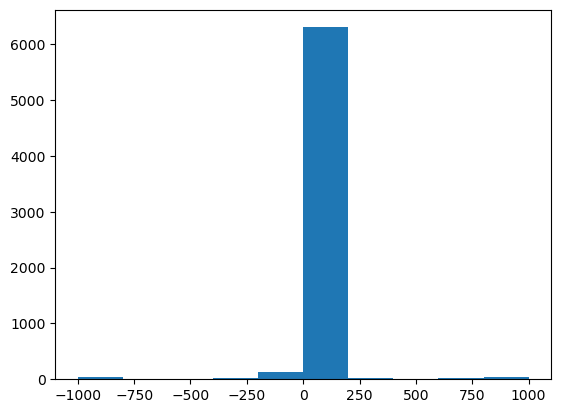

In [115]:
plt.hist(df_flujos['FlujosN1'])

In [110]:
def flux_transformer(v):

    '''
    This function transforms fluxes into log2 scale with three additions:
    - zero values are kept.
    - values between 0 and 2 are adjusted to fit below one.
    - negative fluxes are considered. 
    '''

    def adjusted(v):
        new = (np.log2(v + 0.125) + 3) / 4
        return np.min([new, 1])

    if v == 0:
        vprime = 0
    elif v > 0:
        if v < 2:
            vprime = adjusted(v)
        else:
            vprime = np.log2(v)
    elif v < 0:
        v = np.abs(v)
        if v < 2:
            vprime = -adjusted(v)
        else:
            vprime = -np.log2(v)
    else:
        raise ValueError('found value not considered')

    return vprime

In [111]:
columns_to_transform = ['FlujosN1', 'FlujosN2', 'FlujosN3', 'FlujosC1', 'FlujosC2', 'FlujosC3']
t_df_fluxes = df_flujos[columns_to_transform].applymap(flux_transformer)
#t_df_fluxes['Reacciones'] = df_flujos['Reacciones']
t_df_fluxes
print(t_df_fluxes)

      FlujosN1  FlujosN2  FlujosN3  FlujosC1  FlujosC2  FlujosC3
0          0.0       0.0       0.0       0.0       0.0       0.0
1          0.0       0.0       0.0       0.0       0.0       0.0
2          0.0       0.0       0.0       0.0       0.0       0.0
3          0.0       0.0       0.0       0.0       0.0       0.0
4          0.0       0.0       0.0       0.0       0.0       0.0
...        ...       ...       ...       ...       ...       ...
6592       0.0       0.0       0.0       0.0       0.0       0.0
6593       0.0       0.0       0.0       0.0       0.0       0.0
6594       0.0       0.0       0.0       0.0       0.0       0.0
6595       0.0       0.0       0.0       0.0       0.0       0.0
6596       0.0       0.0       0.0       0.0       0.0       0.0

[6597 rows x 6 columns]


(array([  71.,   21.,   14.,   15.,   30., 6284.,   22.,   20.,   34.,
          86.]),
 array([-9.96578428, -7.97262743, -5.97947057, -3.98631371, -1.99315686,
         0.        ,  1.99315686,  3.98631371,  5.97947057,  7.97262743,
         9.96578428]),
 <BarContainer object of 10 artists>)

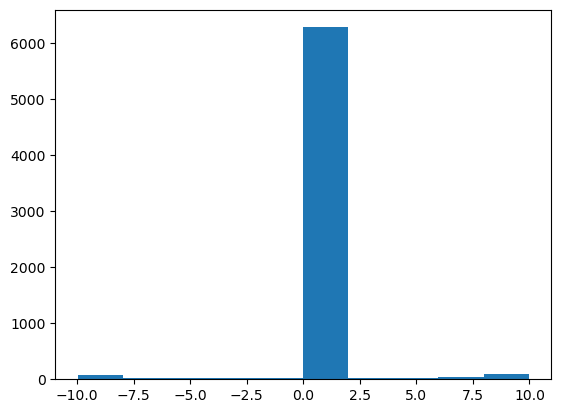

In [116]:
plt.hist(t_df_fluxes['FlujosN1'])

In [115]:
#variability = t_df_fluxes.std(axis = 0)

#s_cols = variability.sort_values(ascending = False)
#s_cols = s_cols.head(200)
#s_colnames = s_cols.index
#var_df = t_df_fluxes[s_colnames]
#var_df

,FlujosC2,FlujosC1,FlujosN3,FlujosN2,FlujosN1,FlujosC3
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
6592,0.0,0.0,0.0,0.0,0.0,0.0
6593,0.0,0.0,0.0,0.0,0.0,0.0
6594,0.0,0.0,0.0,0.0,0.0,0.0
6595,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
from scipy import stats
from statsmodels.stats import multitest
import seaborn as sns

In [28]:
df = pd.DataFrame({
    'FlujosN1': t_df_fluxes['FlujosN1'],
    'FlujosC1': t_df_fluxes['FlujosC1'],
})
df

,FlujosN1,FlujosC1
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
8651,9.965784,8.643856
8652,9.965784,8.643856
8653,9.965784,0.000000
8654,9.965784,0.000000


In [30]:
df['T-Statistic'] = np.nan
df['P-Value'] = np.nan

# Realizar t-test independiente para cada fila
for index, row in df.iterrows():
   try:
        # Verificar si hay suficiente variabilidad en los datos
        if np.var([row['FlujosN1'], row['FlujosC1']]) > 0:
            t_statistic, p_value = stats.ttest_ind([row['FlujosN1']], [row['FlujosC1']], nan_policy='omit')
            df.at[index, 'T-Statistic'] = t_statistic
            df.at[index, 'P-Value'] = p_value
        else:
            # Asignar NaN si no hay suficiente variabilidad
            df.at[index, 'T-Statistic'] = np.nan
            df.at[index, 'P-Value'] = np.nan
            print(f"Poca variabilidad en la fila {index}")
    except Exception as e:
        print(f"Error en la fila {index}: {e}")

# Imprimir DataFrame con resultados del t-test
print(df[['Reacciones', 'T-Statistic', 'P-Value']])



IndentationError: unindent does not match any outer indentation level (<tokenize>, line 17)

In [35]:
#for index, row in df.iterrows():
 #   try:
  #      # Verificar si hay suficiente variabilidad en los datos
   #     if np.var([row['FlujosN1'], row['FlujosC1']]) > 0:
    #        t_statistic, p_value = stats.ttest_ind([row['FlujosN1']], [row['FlujosC1']], nan_policy='omit')
     #       df.at[index, 'T-Statistic'] = t_statistic
      #      df.at[index, 'P-Value'] = p_value
       # else:
        #    # Asignar NaN si no hay suficiente variabilidad
         #   df.at[index, 'T-Statistic'] = np.nan
          #  df.at[index, 'P-Value'] = np.nan
           # print(f"Poca variabilidad en la fila {index}")
    #except Exception as e:
     #   print(f"Error en la fila {index}: {e}")

## Imprimir DataFrame con resultados del t-test
#print(df[['Reacciones', 'T-Statistic', 'P-Value']])

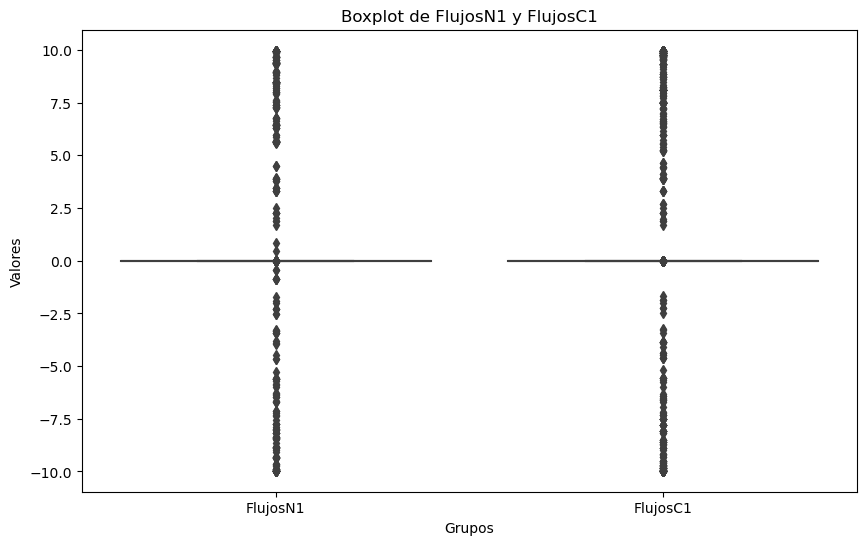

In [111]:
#plt.figure(figsize=(10, 6))
#sns.boxplot(data=df[['FlujosN1', 'FlujosC1']])
#plt.title('Boxplot de FlujosN1 y FlujosC1')
#plt.xlabel('Grupos')
#plt.ylabel('Valores')
#plt.show()

In [31]:

df['T-Statistic'] = np.nan
df['P-Value'] = np.nan

# Realizar t-test independiente para cada fila
for index, row in df.iterrows():
    t_statistic, p_value = stats.ttest_ind([row['FlujosN1']], [row['FlujosC1']], nan_policy='omit')
    df.at[index, 'T-Statistic'] = t_statistic
    df.at[index, 'P-Value'] = p_value
# Crear el Volcano Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LogFoldChange', y='MinusLogP', data=t_df_fluxes, hue='MinusLogP > Threshold', palette={False: 'grey', True: 'red'}, s=100)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=threshold, color='black', linestyle='--', linewidth=1)
plt.title('Volcano Plot - Comparación entre FlujosN1 y FlujosC1')
plt.xlabel('Log Fold Change (FlujosC1 vs FlujosN1)')
plt.ylabel('-log10(p-value)')

C:\Users\NOE\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


ValueError: Could not interpret value `LogFoldChange` for parameter `x`

<Figure size 1000x600 with 0 Axes>

In [33]:
flujos_n1 = t_df_fluxes['FlujosN1']
flujos_c1 = t_df_fluxes['FlujosC1']
t_statistic, p_value = stats.ttest_ind(flujos_n1, flujos_c1, nan_policy='omit')

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 4.6492973601146685
P-Value: 3.3552686660467456e-06


In [34]:

t_stat, p_value = stats.ttest_ind(flujos_n1, flujos_c1)
def calculate_p_value(row):
    t_stat, p_value = stats.ttest_ind(row['FlujosN1'], row['FlujosC1'])
    return p_value

# Aplica la función a cada fila del DataFrame y crea una nueva columna 'p_value'
df_fluxes['p_value'] = df_fluxes.apply(calculate_p_value, axis=1)

print(p_values)

NameError: name 'df_fluxes' is not defined

# ---------------------------------------------

In [112]:
t_df_fluxes

,FlujosN1,FlujosN2,FlujosN3,FlujosC1,FlujosC2,FlujosC3
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
6592,0.0,0.0,0.0,0.0,0.0,0.0
6593,0.0,0.0,0.0,0.0,0.0,0.0
6594,0.0,0.0,0.0,0.0,0.0,0.0
6595,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
plt.hist(t_d)

In [122]:
t_df_fluxes.columns

Index(['FlujosN1', 'FlujosN2', 'FlujosN3', 'FlujosC1', 'FlujosC2', 'FlujosC3'], dtype='object')

In [125]:
t_statistic, p_values = stats.ttest_ind(t_df_fluxes[['FlujosN1', 'FlujosN2', 'FlujosN3']],
                                        t_df_fluxes[['FlujosC1', 'FlujosC2', 'FlujosC3']], axis = 1, nan_policy = 'omit')
p_values


C:\Users\NOE\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


array([nan, nan, nan, ..., nan, nan, nan])

In [128]:
p_values.max()

nan

In [114]:
p_values = []
for index, row in t_df_fluxes.iterrows():
    t_statistic, p_value = stats.ttest_ind(row['FlujosN1','FlujosN2',], row['FlujosC1'], nan_policy='omit')
    p_values.append(p_value)
print(p_values)

C:\Users\NOE\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [ ]:
fold_change = np.log2(np.mean(normal_models, axis = 0)) - np.log2(np.mean(cancer_models, axis = 0))
fold_change[np.isnan(fold_change)] = 0
p_values[np.isnan(p_values)] = 1.0  
reject, q_values = multitest.fdrcorrection(p_values)

t_results = pd.DataFrame({
    'reaction': t_fluxes_df.columns,
    'p_value': p_values,
    'q_value': q_values,
    'log_fc': fold_change
})

t_results['sign'] = 'NORMAL'
for idx, row in t_results.iterrows():
    if row['q_value'] < 0.05 and row['log_fc'] > 1:
        t_results.loc[idx, 'sign'] = 'UP'
    elif row['q_value'] < 0.05 and row['log_fc'] < -1:
        t_results.loc[idx, 'sign'] = 'DOWN'

t_fluxes_sign = t_fluxes_df[t_results[t_results['sign'] != 'NORMAL']['reaction'].values]
t_fluxes_sign.head(